# Components

Components are usually constructed by combining multiple blocks. As opposed to models, they don't have a default architecture. Instead, the architecture (including the number of features in each layer) is passed as arguments to the constructor. This makes components more flexible than models, but also more complex to use. Models are usually constructed by combining multiple components.



## Available components

### MultiLayerPerceptron

In [1]:
import deeplay as dl
import torch.nn as nn

mlp = dl.MultiLayerPerceptron(
    in_features=10,
    hidden_features=[20, 30, 40],
    out_features=5,
    out_activation=dl.torch.nn.Tanh,
)

print(mlp)

MultiLayerPerceptron(
  (blocks): LayerList(
    (0): LinearBlock(
      (layer): Layer[Linear](in_features=10, out_features=20, bias=True)
      (activation): Layer[ReLU]()
    )
    (1): LinearBlock(
      (layer): Layer[Linear](in_features=20, out_features=30, bias=True)
      (activation): Layer[ReLU]()
    )
    (2): LinearBlock(
      (layer): Layer[Linear](in_features=30, out_features=40, bias=True)
      (activation): Layer[ReLU]()
    )
    (3): LinearBlock(
      (layer): Layer[Linear](in_features=40, out_features=5, bias=True)
      (activation): Layer[Tanh]()
    )
  )
)


### ConvolutionalNeuralNetwork

In [8]:
cnn = dl.ConvolutionalNeuralNetwork(
    in_channels=3,
    hidden_channels=[16, 32, 64],
    out_channels=10,
    out_activation=dl.torch.nn.Tanh,
    pool=dl.Layer(nn.MaxPool2d, kernel_size=2),
)

cnn.normalized(
    dl.Layer(nn.BatchNorm2d),
    after_last_layer=True,
    mode='insert',
    after="layer"
)

cnn.strided(
    2, apply_to_first=True
)

cnn.pooled(
    dl.Layer(nn.AvgPool2d, kernel_size=2),
    before_first=True
)

print(cnn)

ConvolutionalNeuralNetwork(
  (blocks): LayerList(
    (0): Conv2dBlock(
      (pool): Layer[AvgPool2d](kernel_size=2)
      (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=3, stride=2, padding=1)
      (normalization): Layer[BatchNorm2d](num_features=16)
      (activation): Layer[ReLU]()
    )
    (1): Conv2dBlock(
      (pool): Layer[AvgPool2d](kernel_size=2)
      (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1)
      (normalization): Layer[BatchNorm2d](num_features=32)
      (activation): Layer[ReLU]()
    )
    (2): Conv2dBlock(
      (pool): Layer[AvgPool2d](kernel_size=2)
      (layer): Layer[Conv2d](in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1)
      (normalization): Layer[BatchNorm2d](num_features=64)
      (activation): Layer[ReLU]()
    )
    (3): Conv2dBlock(
      (pool): Layer[AvgPool2d](kernel_size=2)
      (layer): Layer[Conv2d](in_channels=64, out_channels=10, kernel_size=3, stride=2, 

In [9]:
encoder = dl.ConvolutionalEncoder2d(
    in_channels=3,
    hidden_channels=[16, 32, 64],
    out_channels=10,
    out_activation=dl.torch.nn.Tanh,
)

encoder.strided(stride=2, apply_to_first_layer=True, apply_to_last_layer=True) \
       .pooled(dl.Layer(nn.AvgPool2d, kernel_size=2)) \
       .normalized(dl.Layer(nn.BatchNorm2d), after_last_layer=True, mode='insert', after="layer")


print(encoder)

ConvolutionalEncoder2d(
  (blocks): LayerList(
    (0): Conv2dBlock(
      (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=3, stride=2, padding=1)
      (normalization): Layer[BatchNorm2d](num_features=16)
      (activation): Layer[ReLU]()
    )
    (1): Conv2dBlock(
      (pool): Layer[AvgPool2d](kernel_size=2)
      (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1)
      (normalization): Layer[BatchNorm2d](num_features=32)
      (activation): Layer[ReLU]()
    )
    (2): Conv2dBlock(
      (pool): Layer[AvgPool2d](kernel_size=2)
      (layer): Layer[Conv2d](in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1)
      (normalization): Layer[BatchNorm2d](num_features=64)
      (activation): Layer[ReLU]()
    )
    (3): Conv2dBlock(
      (pool): Layer[AvgPool2d](kernel_size=2)
      (layer): Layer[Conv2d](in_channels=64, out_channels=10, kernel_size=3, stride=2, padding=1)
      (normalization): Layer[BatchNorm2

In [4]:
decoder = dl.ConvolutionalDecoder2d(
    in_channels=10,
    hidden_channels=[64, 32, 16],
    out_channels=3,
    out_activation=dl.torch.nn.Tanh,
)

decoder.upsampled(
    dl.Layer(nn.Upsample, scale_factor=2),
    apply_to_last_layer=True, 
)

print(decoder)

ConvolutionalDecoder2d(
  (blocks): LayerList(
    (0): Conv2dBlock(
      (layer): Layer[Conv2d](in_channels=10, out_channels=64, kernel_size=3, stride=1, padding=1)
      (activation): Layer[ReLU]()
      (upsample): Layer[Upsample](scale_factor=2)
    )
    (1): Conv2dBlock(
      (layer): Layer[Conv2d](in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
      (activation): Layer[ReLU]()
      (upsample): Layer[Upsample](scale_factor=2)
    )
    (2): Conv2dBlock(
      (layer): Layer[Conv2d](in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1)
      (activation): Layer[ReLU]()
      (upsample): Layer[Upsample](scale_factor=2)
    )
    (3): Conv2dBlock(
      (layer): Layer[Conv2d](in_channels=16, out_channels=3, kernel_size=3, stride=1, padding=1)
      (activation): Layer[Tanh]()
      (upsample): Layer[Upsample](scale_factor=2)
    )
  )
  (preprocess): Layer[Identity]()
)


In [16]:
encdec = dl.ConvolutionalEncoderDecoder2d(
    in_channels=3,
    encoder_channels=[16, 32, 64],
    decoder_channels=None,
    out_channels=3,
    out_activation=dl.torch.nn.Tanh,
)

encdec

ConvolutionalEncoderDecoder2d(
  (encoder): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (1): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (2): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
    )
    (postprocess): Layer[Identity]()
  )
  (bottleneck): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=64, out_channels=64, kernel_size=3, stride=1, p

In [17]:
encdec = dl.ConvolutionalEncoderDecoder2d(
    in_channels=3,
    encoder_channels=[16, 32, 64],
    decoder_channels=[32, 16],
    bottleneck_channels=[],
    out_channels=3,
    out_activation=dl.torch.nn.Tanh,
)

encdec

ConvolutionalEncoderDecoder2d(
  (encoder): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (1): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (2): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
    )
    (postprocess): Layer[Identity]()
  )
  (bottleneck): Layer[Identity]()
  (decoder): ConvolutionalDecoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation):

In [18]:
encdec = dl.ConvolutionalEncoderDecoder2d(
    in_channels=3,
    encoder_channels=[16, 32, 64],
    bottleneck_channels=None,
    out_channels=3,
    out_activation=dl.torch.nn.Tanh,
)

encdec

ConvolutionalEncoderDecoder2d(
  (encoder): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (1): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (2): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
    )
    (postprocess): Layer[Identity]()
  )
  (bottleneck): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=64, out_channels=64, kernel_size=3, stride=1, p

In [19]:
unet = dl.UNet2d(
    in_channels=3,
    encoder_channels=[16, 32, 64],
    bottleneck_channels=None,
    decoder_channels=[32, 16],
    out_channels=3,
    out_activation=dl.torch.nn.Tanh,
    skip=dl.ops.Add()
)

print(unet)

UNet2d(
  (encoder): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (1): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (2): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
    )
    (postprocess): Layer[Identity]()
  )
  (bottleneck): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        (acti

In [ ]:
unet = dl.UNet2d(
    in_channels=3,
    encoder_channels=[16, 32, 64],
    bottleneck_channels=None,
    decoder_channels=[32, 16],
    out_channels=3,
    out_activation=dl.torch.nn.Tanh,
)

print(unet)

In [25]:
rnn = dl.RecurrentNeuralNetwork(
    in_features=10,
    hidden_features=[20, 30, 40],
    out_features=5,
    batch_first=True,
    return_cell_state=False,
)

rnn.bidirectional()

print(rnn)

RecurrentNeuralNetwork(
  (blocks): LayerList(
    (0): Sequence1dBlock(
      (layer): Layer[LSTM](input_size=10, hidden_size=20, batch_first=True, bidirectional=True)
    )
    (1): Sequence1dBlock(
      (layer): Layer[LSTM](input_size=20, hidden_size=30, batch_first=True, bidirectional=True)
    )
    (2): Sequence1dBlock(
      (layer): Layer[LSTM](input_size=30, hidden_size=40, batch_first=True, bidirectional=True)
    )
    (3): Sequence1dBlock(
      (layer): Layer[LSTM](input_size=40, hidden_size=5, batch_first=True, bidirectional=True)
    )
  )
)


# Graph conv net

In [20]:
gcnn = dl.GraphConvolutionalNeuralNetwork(
    in_features=10,
    hidden_features=[20, 30, 40],
    out_features=5,
    out_activation=dl.torch.nn.Tanh,
)



gcnn

GraphConvolutionalNeuralNetwork(
  (normalize): Layer[sparse_laplacian_normalization]()
  (blocks): LayerList(
    (0): TransformPropagateUpdate(
      (transform): Layer[Linear](in_features=10, out_features=20)
      (propagate): Layer[propagation]()
      (update): Layer[ReLU]()
    )
    (1): TransformPropagateUpdate(
      (transform): Layer[Linear](in_features=20, out_features=30)
      (propagate): Layer[propagation]()
      (update): Layer[ReLU]()
    )
    (2): TransformPropagateUpdate(
      (transform): Layer[Linear](in_features=30, out_features=40)
      (propagate): Layer[propagation]()
      (update): Layer[ReLU]()
    )
    (3): TransformPropagateUpdate(
      (transform): Layer[Linear](in_features=40, out_features=5)
      (propagate): Layer[propagation]()
      (update): Layer[Tanh]()
    )
  )
)

In [23]:
mpgnn = dl.MessagePassingNeuralNetwork(
    hidden_features=[20, 30, 40],
    out_features=5,
    out_activation=dl.torch.nn.Tanh,
)

mpgnn

MessagePassingNeuralNetwork(
  (blocks): LayerList(
    (0): TransformPropagateUpdate(
      (transform): Transform(
        (combine): Cat()
        (layer): Layer[LazyLinear](out_features=20)
        (activation): Layer[ReLU]()
      )
      (propagate): Sum()
      (update): Update(
        (combine): Cat()
        (layer): Layer[LazyLinear](out_features=20)
        (activation): Layer[ReLU]()
      )
    )
    (1): TransformPropagateUpdate(
      (transform): Transform(
        (combine): Cat()
        (layer): Layer[LazyLinear](out_features=30)
        (activation): Layer[ReLU]()
      )
      (propagate): Sum()
      (update): Update(
        (combine): Cat()
        (layer): Layer[LazyLinear](out_features=30)
        (activation): Layer[ReLU]()
      )
    )
    (2): TransformPropagateUpdate(
      (transform): Transform(
        (combine): Cat()
        (layer): Layer[LazyLinear](out_features=40)
        (activation): Layer[Tanh]()
      )
      (propagate): Sum()
      (update

# Blocks

Blocks are the most versatile part of deeplay. They are designed to be be transformed from a base block to any other block that accepts the same input tensor shape and returns the same output tensor shape. We'll show how to do this in the next section.

## LinearBlock

In [27]:
block = dl.LinearBlock(4, 10)
print(block)

block.activated(nn.ReLU, mode="prepend")
print(block)

block.normalized(nn.LayerNorm, mode="insert", after="layer")
print(block)

block.shortcut(merge=dl.ops.Add(), shortcut=dl.Layer(nn.Linear, 4, 10))
print(block)

block.set_dropout(0.2)
print(block)

LinearBlock(
  (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
)
LinearBlock(
  (activation): Layer[ReLU]()
  (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
)
LinearBlock(
  (activation): Layer[ReLU]()
  (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
  (normalization): Layer[LayerNorm](normalized_shape=10)
)
LinearBlock(
  (shortcut_start): Layer[Linear](in_features=4, out_features=10)
  (activation): Layer[ReLU]()
  (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
  (normalization): Layer[LayerNorm](normalized_shape=10)
  (shortcut_end): Add()
)
LinearBlock(
  (shortcut_start): Layer[Linear](in_features=4, out_features=10)
  (activation): Layer[ReLU]()
  (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
  (normalization): Layer[LayerNorm](normalized_shape=10)
  (shortcut_end): Add()
  (dropout): Layer[Dropout](p=0.2)
)


In [28]:
block = dl.LinearBlock(4, 10)
print(block)

block.multi(2) # second block should have in_features=10
print(block)

block["blocks"].all \
    .activated(nn.ReLU) \
    .normalized(nn.LayerNorm, mode="insert", after="layer") \
    .shortcut()
print(block)

block.set_dropout(0.2)
print(block)


LinearBlock(
  (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
)
LinearBlock(
  (blocks): Sequential(
    (0-1): 2 x LinearBlock(
      (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
    )
  )
)
LinearBlock(
  (blocks): Sequential(
    (0-1): 2 x LinearBlock(
      (shortcut_start): Layer[Identity]()
      (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
      (normalization): Layer[LayerNorm](normalized_shape=10)
      (activation): Layer[ReLU]()
      (shortcut_end): Add()
    )
  )
)
LinearBlock(
  (blocks): Sequential(
    (0-1): 2 x LinearBlock(
      (shortcut_start): Layer[Identity]()
      (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
      (normalization): Layer[LayerNorm](normalized_shape=10)
      (activation): Layer[ReLU]()
      (shortcut_end): Add()
    )
  )
  (dropout): Layer[Dropout](p=0.2)
)


### Conv2dBlock

In [30]:
block = dl.Conv2dBlock(3, 10, kernel_size=1)
print(block)

block.activated(nn.ReLU) \
    .strided(2) \
    .shortcut() \
    .normalized(nn.LayerNorm, mode="append")

Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
)


Conv2dBlock(
  (shortcut_start): Conv2dBlock(
    (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=2, padding=0)
    (activation): Layer[Identity]()
  )
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=2, padding=0)
  (activation): Layer[ReLU]()
  (shortcut_end): Add()
  (normalization): Layer[LayerNorm](normalized_shape=10)
)

In [9]:
block = dl.Conv2dBlock(3, 10, kernel_size=1).upsampled()
print(block)

block = dl.Conv2dBlock(3, 10, kernel_size=1).pooled()
print(block)

Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
  (upsample): Layer[ConvTranspose2d](kernel_size=2, stride=2, padding=0)
)
Conv2dBlock(
  (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
)


### Sequence1dBlock

In [10]:
block = dl.Sequence1dBlock(4, 10).LSTM()
print(block)

block = dl.Sequence1dBlock(4, 10).GRU()
print(block)

block = dl.Sequence1dBlock(4, 10).RNN()
print(block)


Sequence1dBlock(
  (layer): Layer[LSTM](input_size=4, hidden_size=10, batch_first=False)
)
Sequence1dBlock(
  (layer): Layer[GRU](input_size=4, hidden_size=10, batch_first=False)
)
Sequence1dBlock(
  (layer): Layer[RNN](input_size=4, hidden_size=10, batch_first=False)
)


## Lower level block methods

Blocks work through named layers executed sequentially based on a list containing the layer names. This can be configured directly.

In [11]:
block = dl.LinearBlock(4, 10).activated(nn.ReLU).normalized()
print(block)

block.configure(order=["layer", "normalization", "activation"])
print(block)


LinearBlock(
  (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
  (activation): Layer[ReLU]()
  (normalization): Layer[BatchNorm1d](num_features=10)
)
LinearBlock(
  (layer): Layer[Linear](in_features=4, out_features=10, bias=True)
  (normalization): Layer[BatchNorm1d](num_features=10)
  (activation): Layer[ReLU]()
)


To add a layer to a block, there are a few methods available:
- `append`
- `prepend`
- `insert`
- `set`

Let's see how to use them.

### `append`


In [12]:
block = dl.Conv2dBlock(3, 10, kernel_size=1)
print(block)

block.append(dl.Layer(nn.ReLU))
print(block) # The name of the layer is automatically set to "relu" based on the class name

block.append(dl.Layer(nn.LayerNorm), name="normalization")
print(block)

Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
)
Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
  (relu): Layer[ReLU]()
)
Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
  (relu): Layer[ReLU]()
  (normalization): Layer[LayerNorm]()
)


### `prepend`

In [13]:
block = dl.Conv2dBlock(3, 10, kernel_size=1)
block.prepend(dl.Layer(nn.MaxPool2d, kernel_size=2), name="pool")
print(block)

Conv2dBlock(
  (pool): Layer[MaxPool2d](kernel_size=2)
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
)


### `insert`

In [14]:
block = dl.Conv2dBlock(3, 10, kernel_size=1).activated(nn.ReLU)
block.insert(dl.Layer(nn.LayerNorm), after="layer", name="normalization")
print(block)

Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
  (normalization): Layer[LayerNorm]()
  (activation): Layer[ReLU]()
)


## `set`

Unlike previous methods, `set` will replace the layer with the given name if it already exists.

In [15]:
block_without_activation = dl.Conv2dBlock(3, 10, kernel_size=1)
block_with_activation = dl.Conv2dBlock(3, 10, kernel_size=1).activated(nn.ReLU) 

block_without_activation.set("activation", nn.ReLU)
block_with_activation.set("activation", nn.ReLU)
print(block_without_activation)
print(block_with_activation)

Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
  (activation): Layer[ReLU]()
)
Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
  (activation): Layer[ReLU]()
)


Layers can be removed using the `remove` method, which removes based on the layer name.

In [16]:
block = dl.Conv2dBlock(3, 10, kernel_size=1).activated(nn.ReLU)
print(block)

block.remove("activation", allow_missing=True)
print(block)

Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
  (activation): Layer[ReLU]()
)
Conv2dBlock(
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
)


# Operations

Operations are special layers that are implemented in deeplay directly. They are not blocks, but can be used as layers in blocks. They are used to perform operations that are not implemented in PyTorch, such as `Flatten` or `Reshape`.

## Merge ops

In [17]:
import torch

merge_add = dl.ops.Add().build()
merge_cat = dl.ops.Cat(dim=1).build()
merge_lam = dl.ops.Lambda(lambda x: x[0] + x[1]).build()

x = torch.randn(2, 3, 4, 5)
y = torch.randn(2, 3, 4, 5)

print(merge_add(x, y).shape)
print(merge_cat(x, y).shape)
print(merge_lam(x, y).shape)

torch.Size([2, 3, 4, 5])
torch.Size([2, 6, 4, 5])
torch.Size([2, 3, 4, 5])


In [18]:
block = dl.Conv2dBlock(3, 10, kernel_size=1).activated(nn.ReLU)
block.shortcut(merge=merge_cat)

Conv2dBlock(
  (shortcut_start): Conv2dBlock(
    (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
    (activation): Layer[Identity]()
  )
  (layer): Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=1, padding=0)
  (activation): Layer[ReLU]()
  (shortcut_end): Cat()
)

### Shape ops

In [19]:
x = torch.randn(2, 3, 4, 5)

reshape = dl.ops.Reshape(-1, 10)
reshape_func = dl.ops.Reshape(lambda shape: (shape[0], -1))

print(reshape(x).shape)
print(reshape_func(x).shape)

torch.Size([12, 10])
torch.Size([2, 60])


In [20]:
x = torch.randn(2, 1, 3, 1)
squeeze = dl.ops.Squeeze(dim=1)
squeeze_all = dl.ops.Squeeze()

print(squeeze(x).shape)
print(squeeze_all(x).shape)



torch.Size([2, 3, 1])
torch.Size([2, 3])


In [21]:
x = torch.randn(2, 3, 4, 5)
unsqueeze = dl.ops.Unsqueeze(dim=1)

print(unsqueeze(x).shape)

torch.Size([2, 1, 3, 4, 5])


In [22]:
x = torch.randn(2, 3, 4, 5)
flatten = dl.ops.Flatten(start_dim=1, end_dim=2)
print(flatten(x).shape)


torch.Size([2, 12, 5])


In [23]:
x = torch.randn(2, 3, 4, 5)
permute = dl.ops.Permute(0, 2, 1, 3)
print(permute(x).shape)

torch.Size([2, 4, 3, 5])


# The configure method

The configure method exists on all DeeplayModule classes. It works by changing the input parameters of the constructor of the class, and subsequently re-initializing the class. For `Layer` classes, the configure method will instead affect the constructor argument of the classtype of the layer. For example, `Layer(nn.Conv2d, 8, 8).configure(kernel_size=5)`.

In [31]:
mlp = dl.MultiLayerPerceptron(
    in_features=10,
    hidden_features=[20, 30, 40],
    out_features=5,
)

mlp.configure(out_activation=nn.Tanh)

MultiLayerPerceptron(
  (blocks): LayerList(
    (0): LinearBlock(
      (layer): Layer[Linear](in_features=10, out_features=20, bias=True)
      (activation): Layer[ReLU]()
    )
    (1): LinearBlock(
      (layer): Layer[Linear](in_features=20, out_features=30, bias=True)
      (activation): Layer[ReLU]()
    )
    (2): LinearBlock(
      (layer): Layer[Linear](in_features=30, out_features=40, bias=True)
      (activation): Layer[ReLU]()
    )
    (3): LinearBlock(
      (layer): Layer[Linear](in_features=40, out_features=5, bias=True)
      (activation): Layer[Tanh]()
    )
  )
)

In [25]:
layer = dl.Layer(nn.Conv2d, in_channels=3, out_channels=10, kernel_size=1)
layer.configure(stride=2)
print(layer)

Layer[Conv2d](in_channels=3, out_channels=10, kernel_size=1, stride=2)


When configuring a Layer, the first positional argument can be used to change the class type of the layer:

In [26]:
layer = dl.Layer(nn.ReLU)
print(layer)
layer.configure(nn.LeakyReLU, negative_slope=0.1)
print(layer)

Layer[ReLU]()
Layer[LeakyReLU](negative_slope=0.1)


# Selections

Selections are a way to apply an operation or configuration to multiple classes at once. There is some special syntax, which is easier to understand through examples.

In [33]:
model = dl.UNet2d(
    in_channels=3,
    encoder_channels=[16, 32],
    out_channels=10,
    out_activation=nn.Tanh,
)
print(model)

# Strings are used to select a direct child
print(model["encoder"].list_names())


UNet2d(
  (encoder): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
      (1): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
    )
    (postprocess): Layer[Identity]()
  )
  (bottleneck): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
        (upsample): Layer[ConvTranspose2d](kernel_size=2, stride=2, padding=0)
      )
    )
  )
  (decoder): ConvolutionalDecoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Lay

In [34]:

# Multiple strings can be used to select multiple successive children
print(model["encoder", "blocks"].list_names())



[('encoder', 'blocks')]


In [36]:
# The | operator can be used to select multiple children at the same level
print(model["encoder|decoder"].list_names())

[('encoder',), ('decoder',)]


In [37]:
# The : operator can be used to select all children at the same level
print(model[:].list_names())


[('encoder',), ('bottleneck',), ('decoder',), ('skip',)]


In [39]:
# The ... operator can be used to select select all children at any level
print(model[...].list_names()) # Here, we select all children of the model


[(), ('encoder',), ('encoder', 'blocks'), ('encoder', 'blocks', '0'), ('encoder', 'blocks', '0', 'layer'), ('encoder', 'blocks', '0', 'activation'), ('encoder', 'blocks', '1'), ('encoder', 'blocks', '1', 'pool'), ('encoder', 'blocks', '1', 'layer'), ('encoder', 'blocks', '1', 'activation'), ('encoder', 'postprocess'), ('bottleneck',), ('bottleneck', 'blocks'), ('bottleneck', 'blocks', '0'), ('bottleneck', 'blocks', '0', 'pool'), ('bottleneck', 'blocks', '0', 'layer'), ('bottleneck', 'blocks', '0', 'activation'), ('bottleneck', 'blocks', '0', 'upsample'), ('decoder',), ('decoder', 'blocks'), ('decoder', 'blocks', '0'), ('decoder', 'blocks', '0', 'layer'), ('decoder', 'blocks', '0', 'activation'), ('decoder', 'blocks', '0', 'upsample'), ('decoder', 'blocks', '1'), ('decoder', 'blocks', '1', 'layer'), ('decoder', 'blocks', '1', 'activation'), ('decoder', 'preprocess'), ('skip',)]


[('encoder', 'blocks'), ('encoder', 'blocks', '0'), ('encoder', 'blocks', '0', 'layer'), ('encoder', 'blocks', '0', 'activation'), ('encoder', 'blocks', '1'), ('encoder', 'blocks', '1', 'pool'), ('encoder', 'blocks', '1', 'layer'), ('encoder', 'blocks', '1', 'activation'), ('bottleneck', 'blocks'), ('bottleneck', 'blocks', '0'), ('bottleneck', 'blocks', '0', 'pool'), ('bottleneck', 'blocks', '0', 'layer'), ('bottleneck', 'blocks', '0', 'activation'), ('bottleneck', 'blocks', '0', 'upsample'), ('decoder', 'blocks'), ('decoder', 'blocks', '0'), ('decoder', 'blocks', '0', 'layer'), ('decoder', 'blocks', '0', 'activation'), ('decoder', 'blocks', '0', 'upsample'), ('decoder', 'blocks', '1'), ('decoder', 'blocks', '1', 'layer'), ('decoder', 'blocks', '1', 'activation')]


In [38]:

# The ... operator can be used to select select all children at any level
print(model[..., "layer"].list_names()) # Here, we first select all children at any level, then we select only the children named "layer"


[('encoder', 'blocks', '0', 'layer'), ('encoder', 'blocks', '1', 'layer'), ('bottleneck', 'blocks', '0', 'layer'), ('decoder', 'blocks', '0', 'layer'), ('decoder', 'blocks', '1', 'layer')]


In [43]:

# The ... operator can be used to select select all children at any level
print(model["encoder", ...].list_names()) # Here, we select all childs of the "encoder" child


[('encoder',), ('encoder', 'blocks'), ('encoder', 'blocks', '0'), ('encoder', 'blocks', '0', 'layer'), ('encoder', 'blocks', '0', 'activation'), ('encoder', 'blocks', '1'), ('encoder', 'blocks', '1', 'pool'), ('encoder', 'blocks', '1', 'layer'), ('encoder', 'blocks', '1', 'activation'), ('encoder', 'postprocess')]


In [44]:
# The ... operator can be used to select select all children at any level
print(model[..., "blocks", ...].list_names()) # Here, we first select all children at any level, then we select the children named "blocks", then we select all children of the "blocks" children


[('encoder', 'blocks'), ('encoder', 'blocks', '0'), ('encoder', 'blocks', '0', 'layer'), ('encoder', 'blocks', '0', 'activation'), ('encoder', 'blocks', '1'), ('encoder', 'blocks', '1', 'pool'), ('encoder', 'blocks', '1', 'layer'), ('encoder', 'blocks', '1', 'activation'), ('bottleneck', 'blocks'), ('bottleneck', 'blocks', '0'), ('bottleneck', 'blocks', '0', 'pool'), ('bottleneck', 'blocks', '0', 'layer'), ('bottleneck', 'blocks', '0', 'activation'), ('bottleneck', 'blocks', '0', 'upsample'), ('decoder', 'blocks'), ('decoder', 'blocks', '0'), ('decoder', 'blocks', '0', 'layer'), ('decoder', 'blocks', '0', 'activation'), ('decoder', 'blocks', '0', 'upsample'), ('decoder', 'blocks', '1'), ('decoder', 'blocks', '1', 'layer'), ('decoder', 'blocks', '1', 'activation')]


In [45]:

# The # operator can be used to select a subset of previously selected children
print(model[..., "layer#:2"].list_names())
print(model[..., "layer#0:2"].list_names())


[('encoder', 'blocks', '0', 'layer'), ('encoder', 'blocks', '1', 'layer')]
[('encoder', 'blocks', '0', 'layer'), ('encoder', 'blocks', '1', 'layer')]


In [46]:
# The , operator can be used to select either of multiple selectors
print(model[..., "layer#0, layer#-1"].list_names())

[('encoder', 'blocks', '0', 'layer'), ('decoder', 'blocks', '1', 'layer')]


In [47]:
# Lets select the first block of the encoder and change the kernel size
model[..., "layer#0"].configure(kernel_size=1, padding=0)
print(model)

UNet2d(
  (encoder): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=1, stride=1, padding=0)
        (activation): Layer[ReLU]()
      )
      (1): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
      )
    )
    (postprocess): Layer[Identity]()
  )
  (bottleneck): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[ReLU]()
        (upsample): Layer[ConvTranspose2d](kernel_size=2, stride=2, padding=0)
      )
    )
  )
  (decoder): ConvolutionalDecoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Lay

The selection can be filtered using the methods:
- `filter`
- `hasattr`
- `isinstance`

In [28]:
print(model[...].isinstance(dl.ConvolutionalEncoder2d).list_names())
print(model["encoder", ...].isinstance(nn.ReLU).list_names())
print(model[...].hasattr("pool").list_names()) # TODO: bugged. should not return decoder.
print(model[...].hasattr("stride").list_names()) 

[('encoder',)]
[('encoder', 'blocks', '0', 'activation'), ('encoder', 'blocks', '1', 'activation')]
[('encoder', 'blocks', '0'), ('encoder', 'blocks', '1'), ('bottleneck', 'blocks', '0'), ('decoder', 'blocks', '0'), ('decoder', 'blocks', '1')]
[('encoder', 'blocks', '0'), ('encoder', 'blocks', '1'), ('bottleneck', 'blocks', '0'), ('decoder', 'blocks', '0'), ('decoder', 'blocks', '1')]


Any method can be applied to the selection, not just `configure`. This will either apply the method to all classes in the selection, or to the first class in the selection. You can choose which one by accessing the `all` or `first` attributes of the selection:

In [29]:
model[..., "layer"].first.configure(kernel_size=5, padding=2)
model[..., "activation"].all.configure(nn.Sigmoid)
model[...].isinstance(dl.Conv2dBlock).all.normalized(nn.BatchNorm2d)
model[...].isinstance(nn.BatchNorm2d).all.initialize(dl.initializers.Constant(weight=1, bias=0))
print(model)

UNet2d(
  (encoder): ConvolutionalEncoder2d(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): Layer[Conv2d](in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=2)
        (activation): Layer[Sigmoid]()
        (normalization): Layer[BatchNorm2d](num_features=16)
      )
      (1): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[Sigmoid]()
        (normalization): Layer[BatchNorm2d](num_features=32)
      )
    )
    (postprocess): Layer[Identity]()
  )
  (bottleneck): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (pool): Layer[MaxPool2d](kernel_size=2, stride=2)
        (layer): Layer[Conv2d](in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        (activation): Layer[Sigmoid]()
        (upsample): Layer[ConvTranspose2d](kernel_size=2, stride=2, padd

# deeplay.vision

Does not exist yet.

# deeplay.language

Does not exist yet.

# deeplay.geometric

Does not exist yet.

# deeplay.activelearning

Contains tools for active learning.

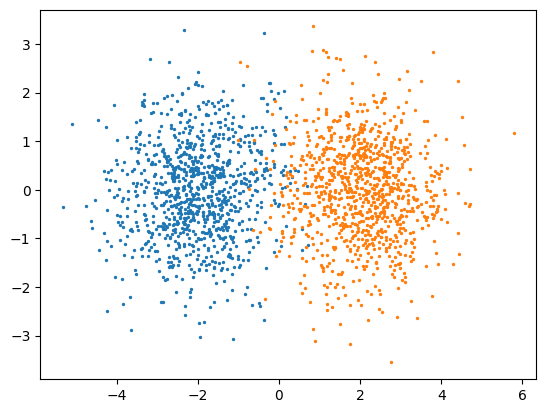

In [48]:
import numpy as np
import matplotlib.pyplot as plt

cluster1 = np.random.normal(0, 1, (1000, 2)) - (2, 0)
cluster2 = np.random.normal(0, 1, (1000, 2)) + (2, 0)

test_cluster1 = np.random.normal(0, 1, (100, 2)) - (2, 0)
test_cluster2 = np.random.normal(0, 1, (100, 2)) + (2, 0)

plt.scatter(cluster1[:, 0], cluster1[:, 1], s=2)
plt.scatter(cluster2[:, 0], cluster2[:, 1], s=2)



In [49]:
net = dl.MultiLayerPerceptron(2, [10], 2)
classifier = dl.BinaryClassifier(net)

In [51]:
import deeplay.activelearning as al
import torch
# Creating an active learning dataset

torch_dataset = torch.utils.data.TensorDataset(
    torch.tensor(np.vstack([cluster1, cluster2]), dtype=torch.float32),
    torch.tensor([0] * 1000 + [1] * 1000, dtype=torch.long)
)

test_torch_dataset = torch.utils.data.TensorDataset(
    torch.tensor(np.vstack([test_cluster1, test_cluster2]), dtype=torch.float32),
    torch.tensor([0] * 100 + [1] * 100, dtype=torch.long)
)

train_dataset = al.ActiveLearningDataset(torch_dataset)
# Initialize the dataset
train_dataset.annotate_random(4)

# Creating an active learning model
al_model = al.UncertaintyStrategy(classifier, criterion=al.Margin(), train_pool=train_dataset, batch_size=8).build()
print(al_model)

UncertaintyStrategy(
  (loss): CrossEntropyLoss()
  (optimizer): Adam[Adam](lr=0.001)
  (train_metrics): MetricCollection,
    prefix=train
  )
  (val_metrics): MetricCollection,
    prefix=val
  )
  (test_metrics): MetricCollection,
    prefix=test
  )
  (classifier): BinaryClassifier(
    (loss): BCELoss()
    (train_metrics): MetricCollection(
      (BinaryAccuracy): BinaryAccuracy(),
      prefix=train
    )
    (val_metrics): MetricCollection(
      (BinaryAccuracy): BinaryAccuracy(),
      prefix=val
    )
    (test_metrics): MetricCollection(
      (BinaryAccuracy): BinaryAccuracy(),
      prefix=test
    )
    (model): MultiLayerPerceptron(
      (blocks): LayerList(
        (0): LinearBlock(
          (layer): Linear(in_features=2, out_features=10, bias=True)
          (activation): ReLU()
        )
        (1): LinearBlock(
          (layer): Linear(in_features=10, out_features=2, bias=True)
          (activation): Identity()
        )
      )
    )
    (optimizer): Adam[Adam

c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


100%|██████████| 7/7 [00:00<00:00, 250.01it/s]


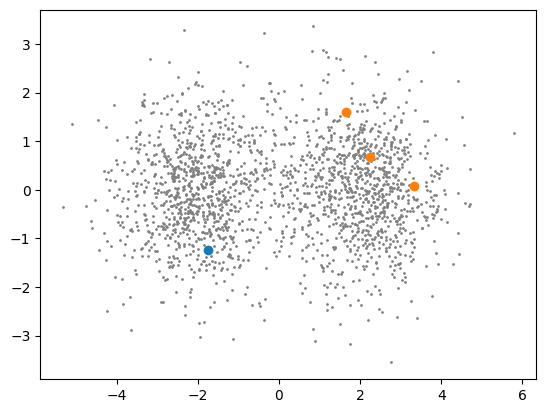

c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

100%|██████████| 7/7 [00:00<00:00, 583.38it/s]


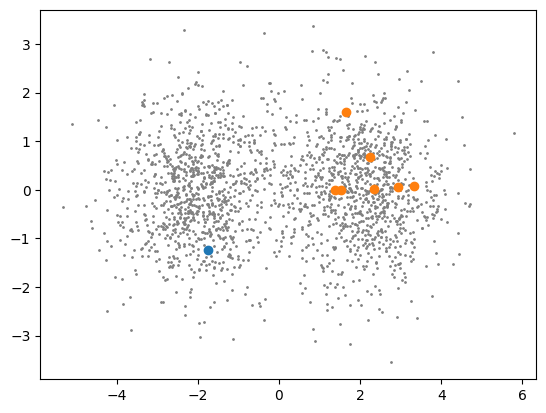

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


100%|██████████| 7/7 [00:00<00:00, 437.53it/s]


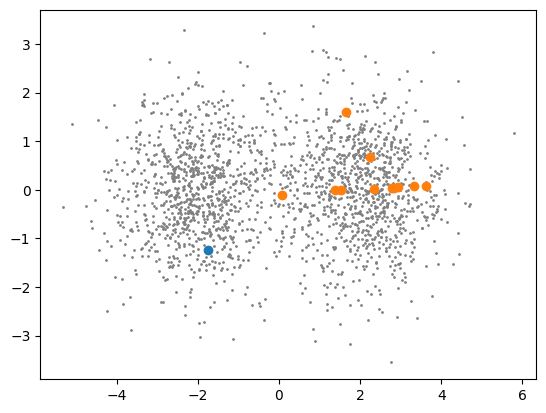

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

100%|██████████| 7/7 [00:00<00:00, 559.86it/s]


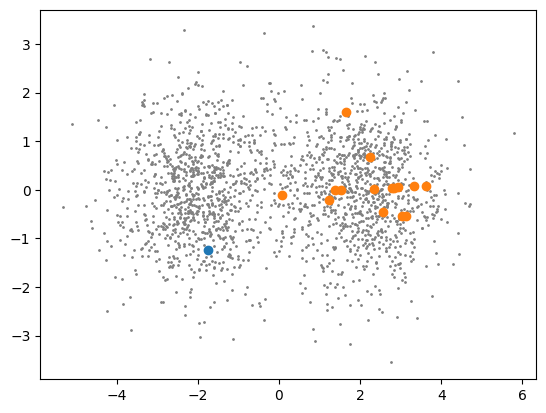

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

100%|██████████| 7/7 [00:00<00:00, 466.65it/s]


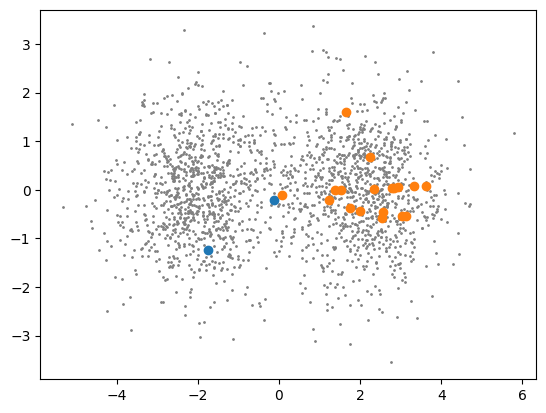

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

100%|██████████| 7/7 [00:00<00:00, 500.01it/s]


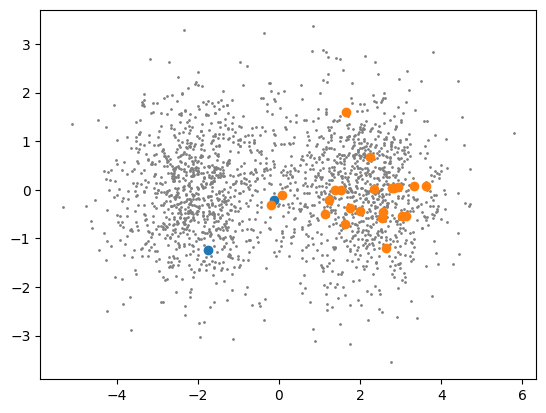

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


100%|██████████| 7/7 [00:00<00:00, 349.97it/s]


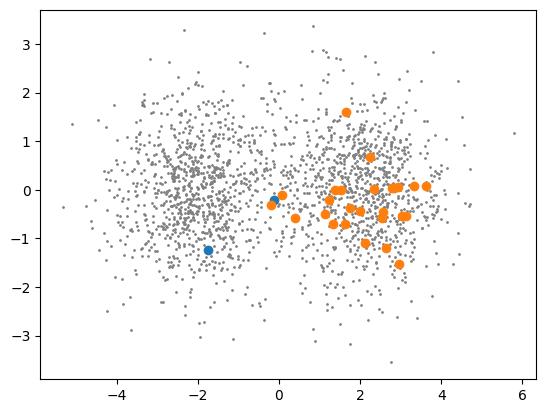

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

100%|██████████| 7/7 [00:00<00:00, 349.98it/s]


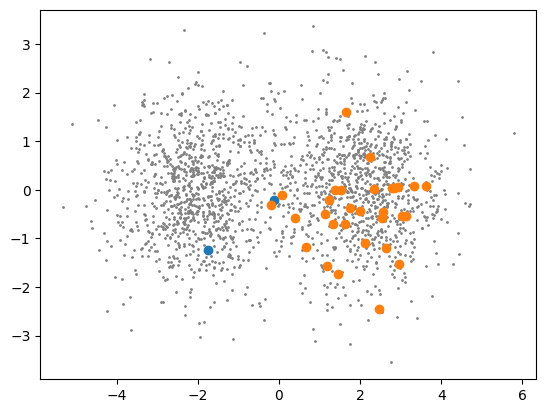

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

100%|██████████| 7/7 [00:00<00:00, 291.67it/s]


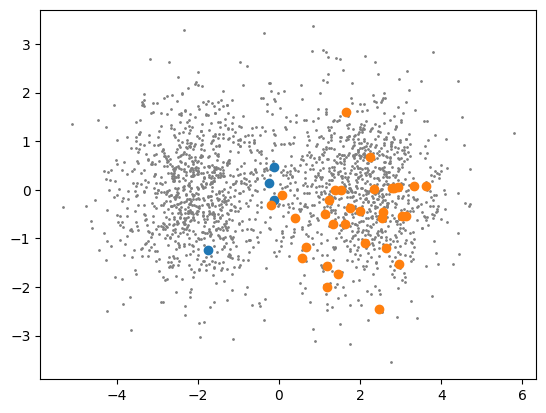

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ loss          │ CrossEntropyLoss │      0 │
│ 1 │ train_metrics │ MetricCollection │      0 │
│ 2 │ val_metrics   │ MetricCollection │      0 │
│ 3 │ test_metrics  │ MetricCollection │      0 │
│ 4 │ classifier    │ BinaryClassifier │     52 │
│ 5 │ optimizer     │ Adam             │      0 │
└───┴───────────────┴──────────────────┴────────┘

Trainable params: 52                                                                                               
Non-trainable params: 0                                                                                            
Total params: 52                                                                                                   
Total estimated model params size (MB): 0

Output()

100%|██████████| 7/7 [00:00<00:00, 304.34it/s]


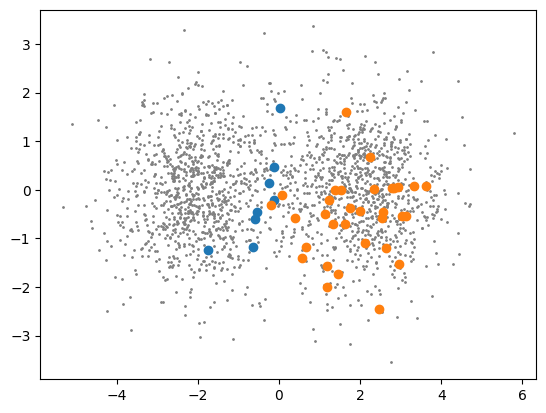

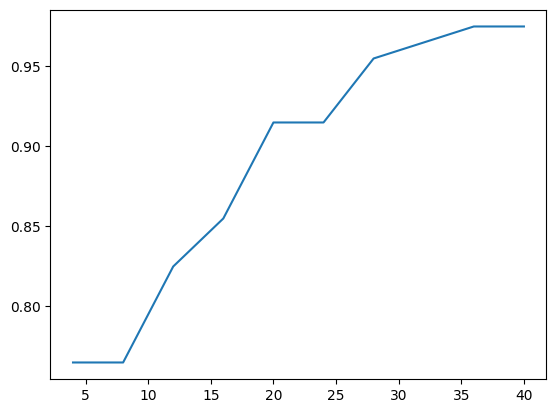

In [53]:
import torchmetrics as tm
accuracy_score = []
num_labeled = []

for iter in range(10):
    trainer = dl.Trainer(max_epochs=20)
    trainer.fit(al_model)
    
    res = al_model.test(test_torch_dataset, {"accuracy": tm.Accuracy("multiclass", num_classes=2)})

    X, y = train_dataset.get_annotated_samples(), train_dataset.get_annotated_labels()

    plt.scatter(cluster1[:, 0], cluster1[:, 1], s=1, c="gray")
    plt.scatter(cluster2[:, 0], cluster2[:, 1], s=1, c="gray")
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c="C0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c="C1")
    plt.show()

    accuracy_score.append(res["accuracy"].cpu())
    num_labeled.append(train_dataset.get_num_annotated())

    # Update the dataset
    al_model.query_and_update(4)
    al_model.reset_model()

plt.plot(num_labeled, accuracy_score)